## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import Data 

In [2]:
df = pd.read_csv('/kaggle/input/financials/Financials.csv')

df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

#### There are spaces in the column names

In [6]:
#Remove spaces unnecessary from column name

df.columns = df.columns.str.strip()

df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [7]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",2014-01-06,6,June,2014


In [8]:
# Remove '$', '-' and commas from columns
clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']


for column in clean:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace('$','').str.replace('-','').str.replace(',','').str.strip()

# Convert to numeric 
df[clean] = df[clean].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_32/941390586.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$','').str.replace('-','').str.replace(',','').str.strip()


In [9]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,647.000000,7.000000e+02,700.000000,637.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,14227.586198,1.696091e+05,145475.211429,27741.010267,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,23562.833079,2.367263e+05,203865.506118,43059.332905,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1061.000000,1.592800e+04,7490.000000,3875.850000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3108.000000,3.554020e+04,22506.250000,11106.100000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,18809.250000,2.610775e+05,245607.500000,25162.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


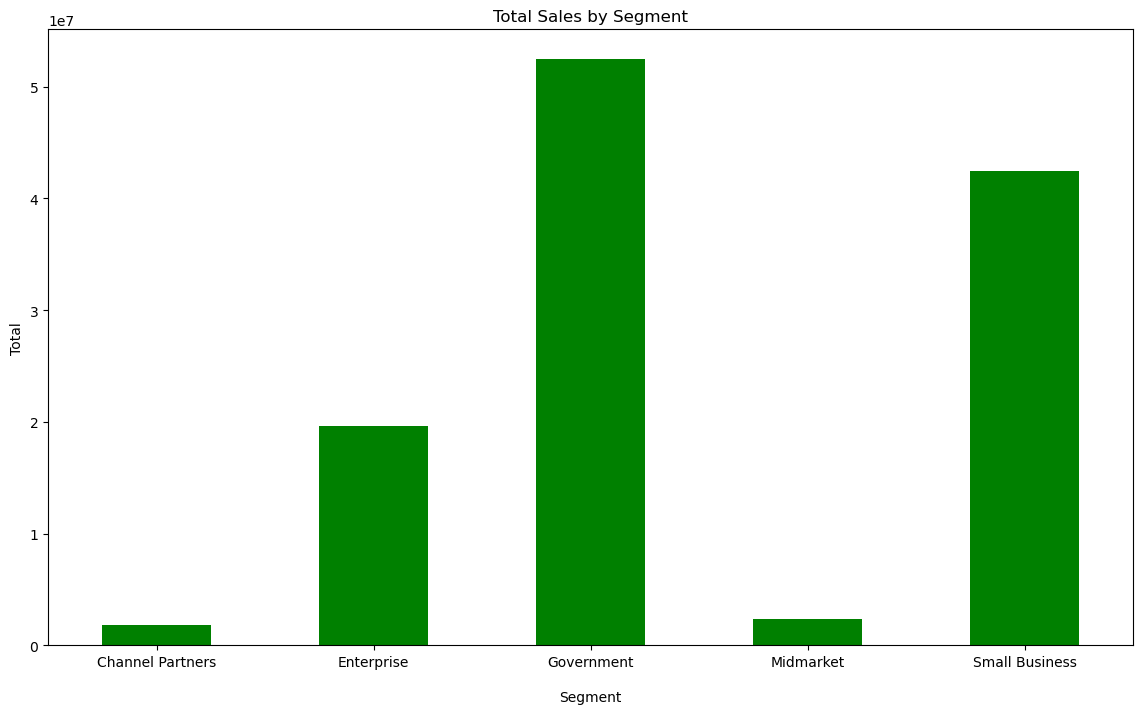

In [10]:
# Total sales and profit per segment

total_per_segment = df.groupby('Segment')['Sales'].sum()

# Plot total sales and profit per segment

ax = total_per_segment.plot(kind='bar', figsize=(14, 8), color=['Green'])
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total')
ax.set_xticklabels(total_per_segment.index, rotation=0)
ax.set_xlabel('Segment', labelpad=15)
plt.show()

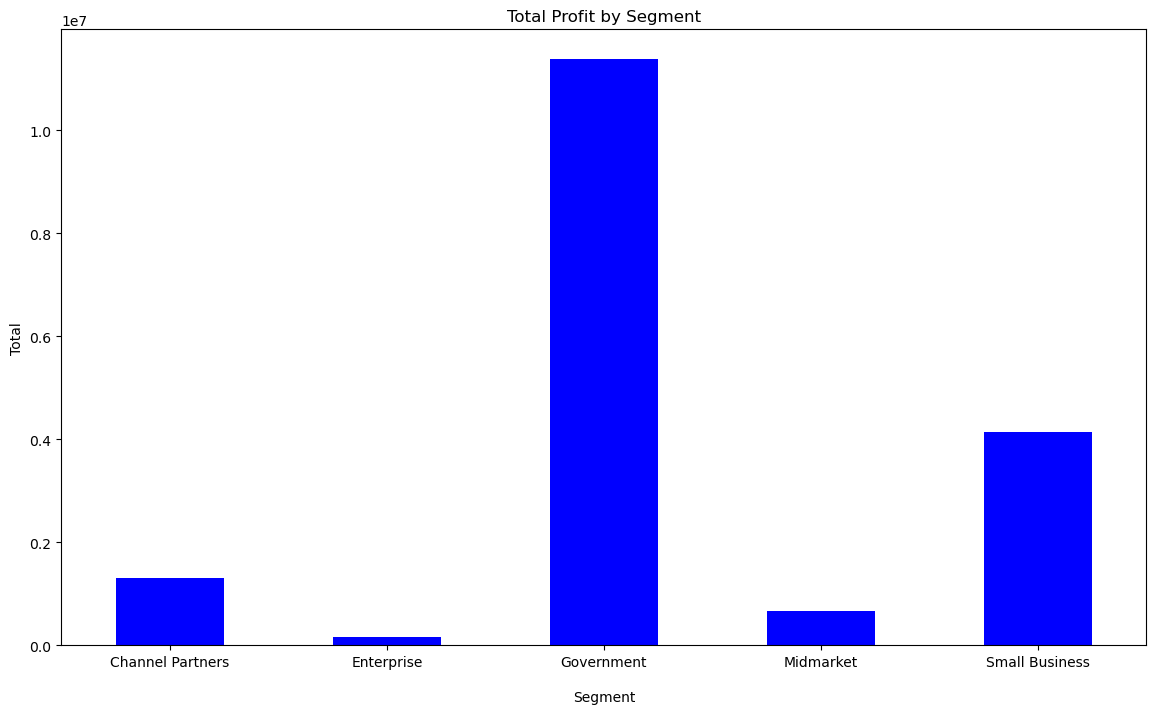

In [11]:
# Profit by segment

total_per_segment = df.groupby('Segment')['Profit'].sum()

# Plot  profit by segment

ax = total_per_segment.plot(kind='bar', figsize=(14, 8), color=['Blue'])
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total')
ax.set_xticklabels(total_per_segment.index, rotation=0)
ax.set_xlabel('Segment', labelpad=15)
plt.show()

##### The Enterprise segment has high sales, but profits are still relatively low

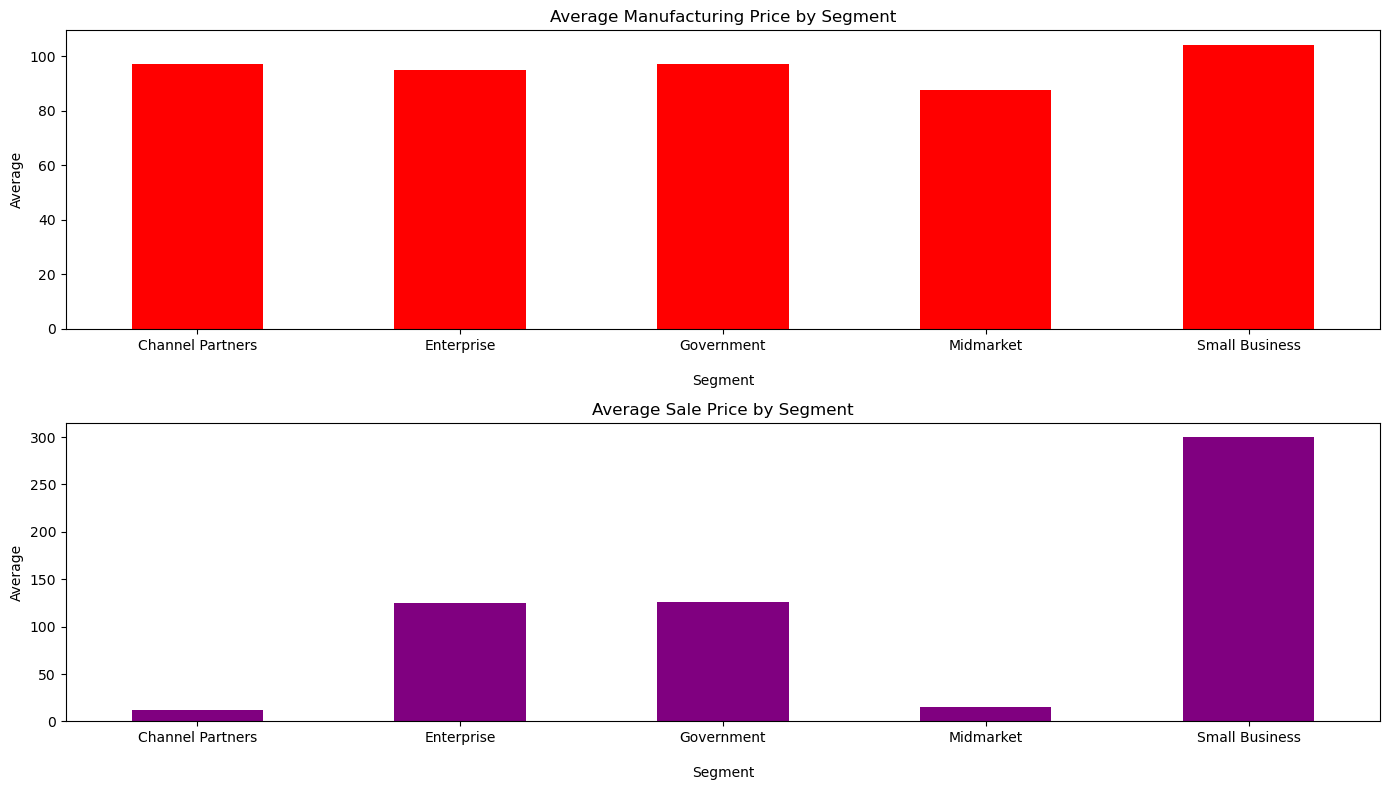

In [12]:
# Average Manufacturing price by segment
manufacturing_segment = df.groupby('Segment')['Manufacturing Price'].mean()

plt.figure(figsize=(14,8))
# Plot Manufacturing price by segment
plt.subplot(2,1,1)
manufacturing_segment.plot(kind='bar', color= 'Red')
plt.title('Average Manufacturing Price by Segment')
plt.xlabel('Segment', labelpad= 15)
plt.ylabel('Average')
plt.xticks(rotation=0)

# Average Sale Price by segment
sale_price_segment = df.groupby('Segment')['Sale Price'].mean()

# Plot Sale price by segment
plt.subplot(2,1,2)
sale_price_segment.plot(kind='bar', color='Purple')
plt.title('Average Sale Price by Segment')
plt.xlabel('Segment', labelpad = 15)
plt.ylabel('Average')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

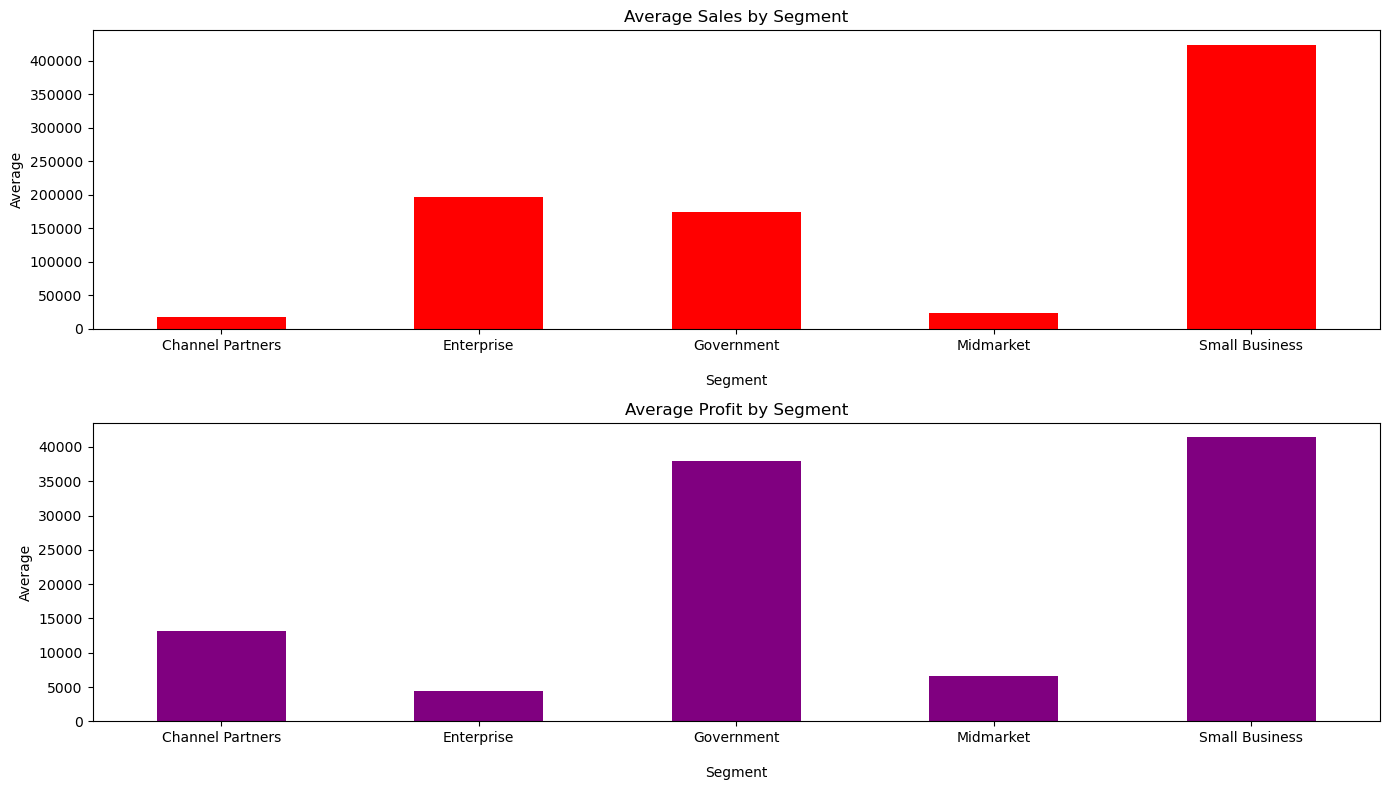

In [13]:
# Average Sales by segment
sales_segment = df.groupby('Segment')['Sales'].mean()

plt.figure(figsize=(14,8))
# Plot Sales by segment
plt.subplot(2,1,1)
sales_segment.plot(kind='bar', color= 'Red')
plt.title('Average Sales by Segment')
plt.xlabel('Segment', labelpad= 15)
plt.ylabel('Average')
plt.xticks(rotation=0)

# Average profit by segment
profit_segment = df.groupby('Segment')['Profit'].mean()

# Plot profit by segment
plt.subplot(2,1,2)
profit_segment.plot(kind='bar', color='Purple')
plt.title('Average Profit by Segment')
plt.xlabel('Segment', labelpad = 15)
plt.ylabel('Average')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

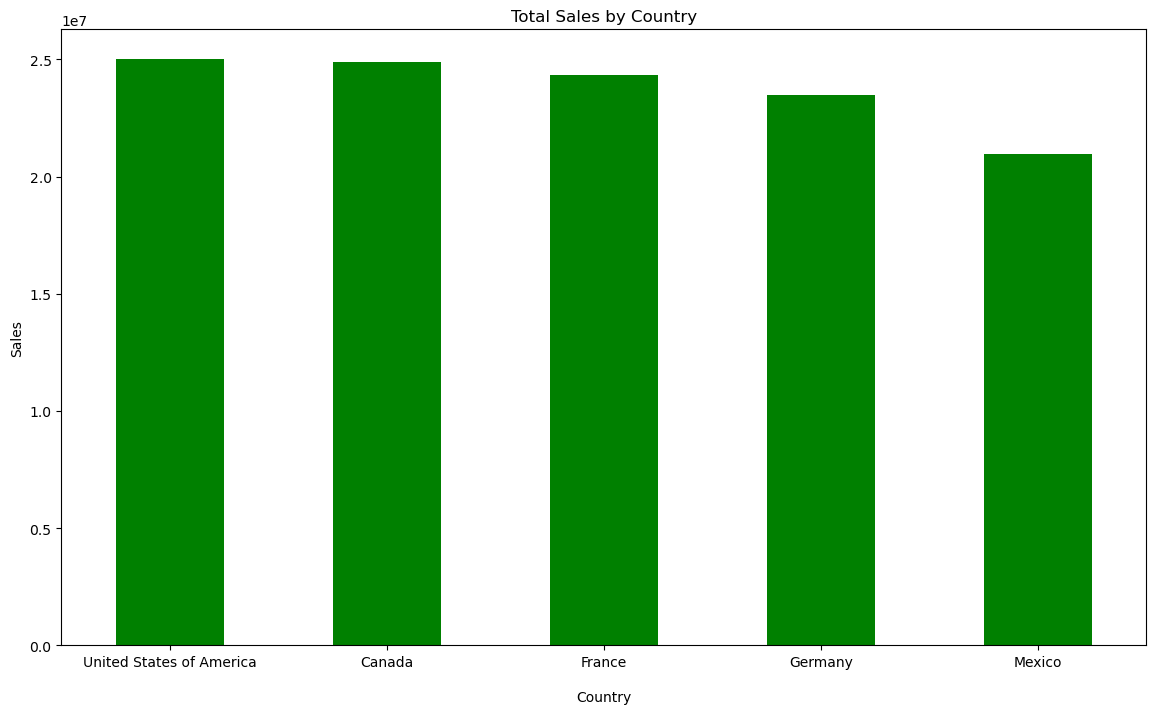

In [14]:
# Total Sales per Country

total_sales_per_country = df.groupby('Country')['Sales'].sum()
total_sales_per_country = total_sales_per_country.sort_values(ascending = False)

# Plot total sales per country

ax1 = total_sales_per_country.plot(kind='bar', figsize=(14, 8), color=['Green'])
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales')
ax1.set_xticklabels(total_sales_per_country.index, rotation=0)
ax1.set_xlabel('Country', labelpad=15)
plt.show()

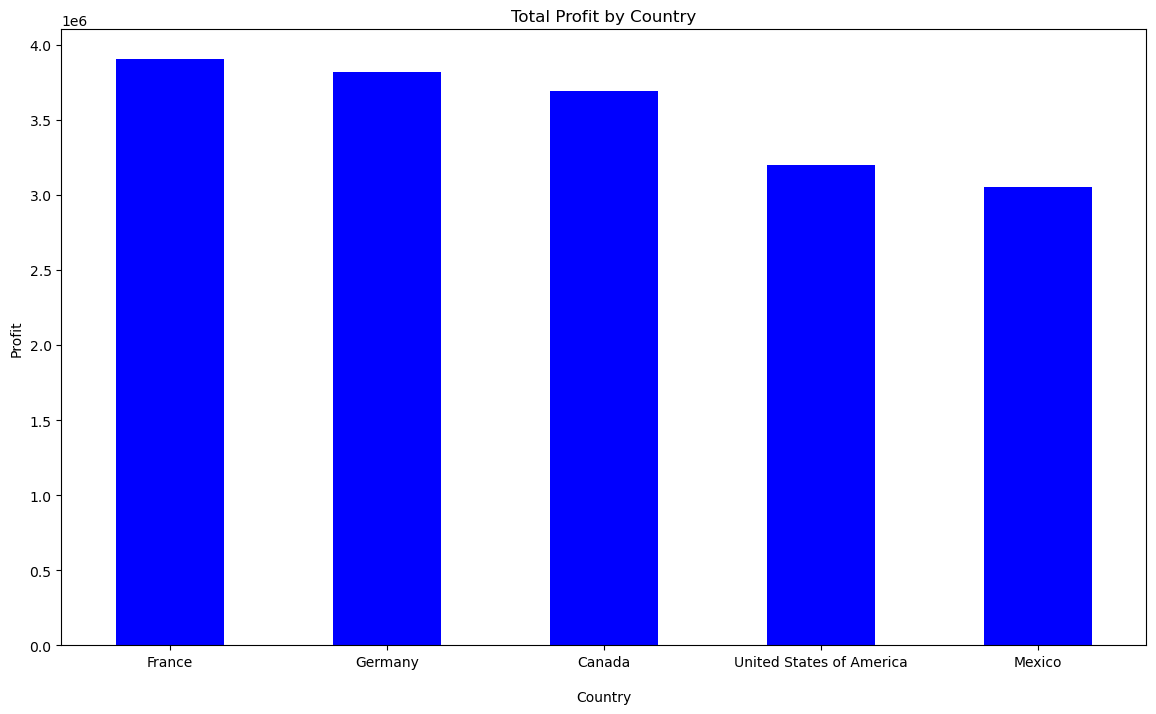

In [15]:
# Total Profit per Country

total_profit_per_country = df.groupby('Country')['Profit'].sum()
total_profit_per_country = total_profit_per_country.sort_values(ascending = False)

# Plot Profit per country

ax2 = total_profit_per_country.plot(kind='bar', figsize=(14, 8), color=['Blue'])
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
ax2.set_xticklabels(total_profit_per_country.index, rotation=0)
ax2.set_xlabel('Country', labelpad=15)


plt.show()

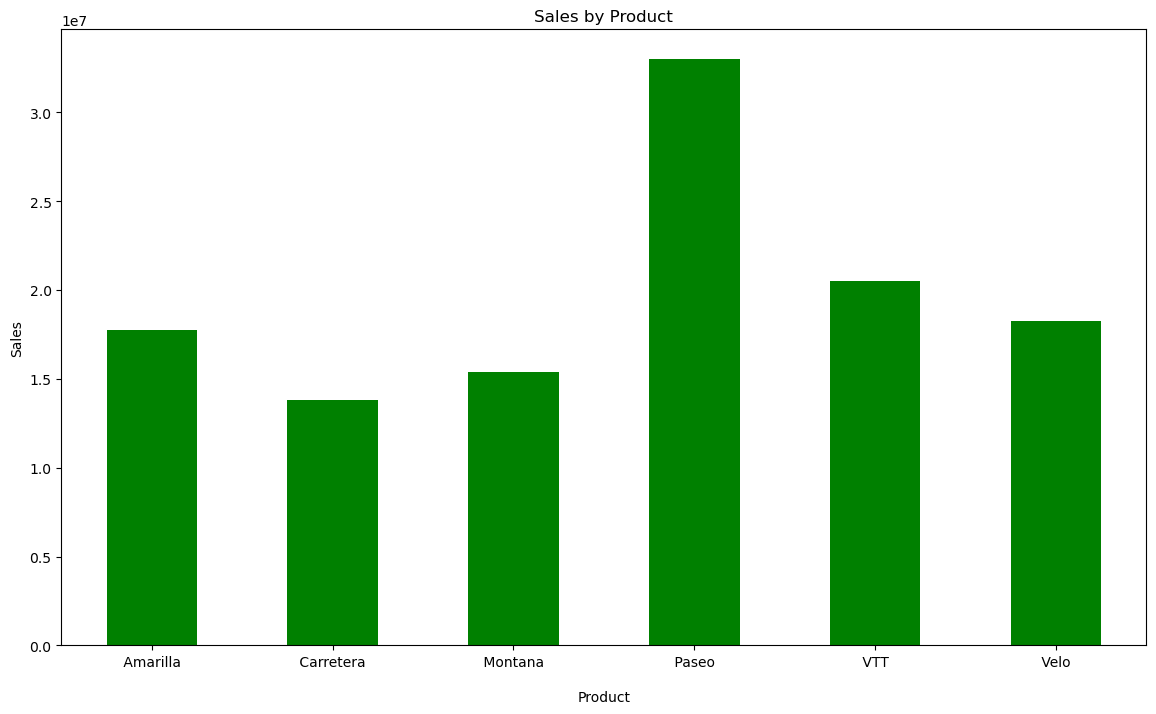

In [16]:
# Sales by Product
product_sales = df.groupby('Product')['Sales'].sum()

# Plot Profit by Product
ax = product_sales.plot(kind='bar', figsize =(14,8),color='Green')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
ax.set_xticklabels(product_sales.index, rotation=0)
ax.set_xlabel('Product', labelpad=15)
plt.show()

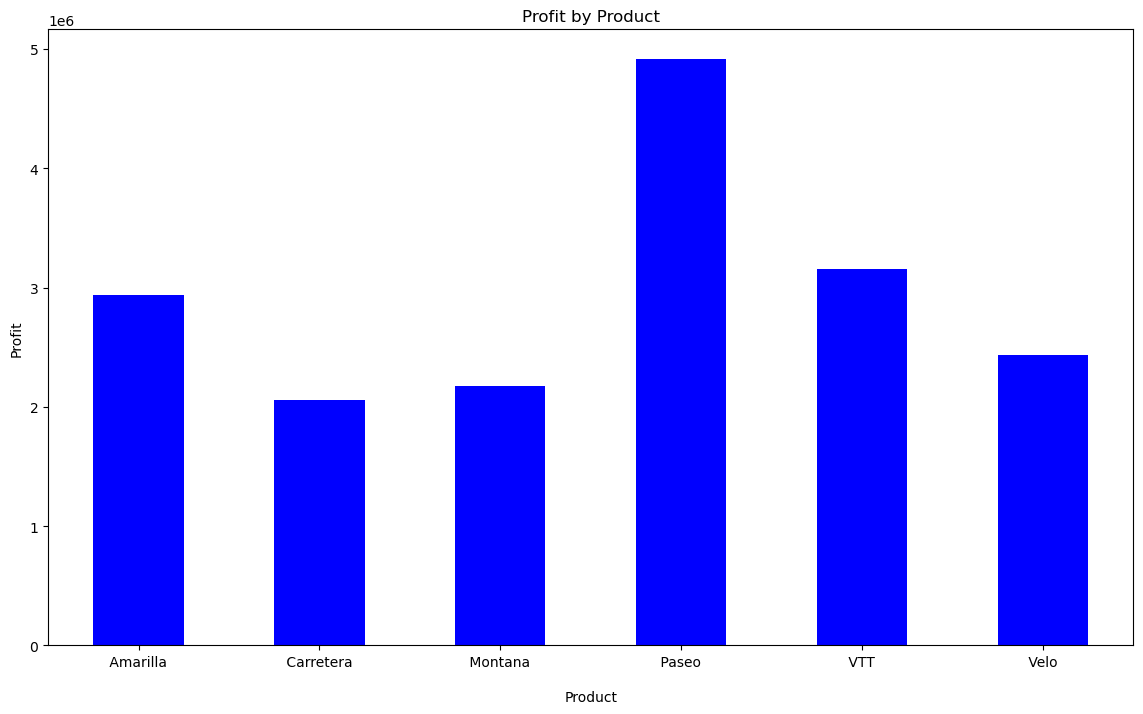

In [17]:
#Profit by Product
product_profit = df.groupby('Product')['Profit'].sum()

# Plot Profit by Product
ax = product_profit.plot(kind='bar', figsize =(14,8),color='Blue')
plt.title('Profit by Product')
plt.xlabel('Product')
plt.ylabel('Profit')
ax.set_xticklabels(product_profit.index, rotation=0)
ax.set_xlabel('Product', labelpad=15)
plt.show()

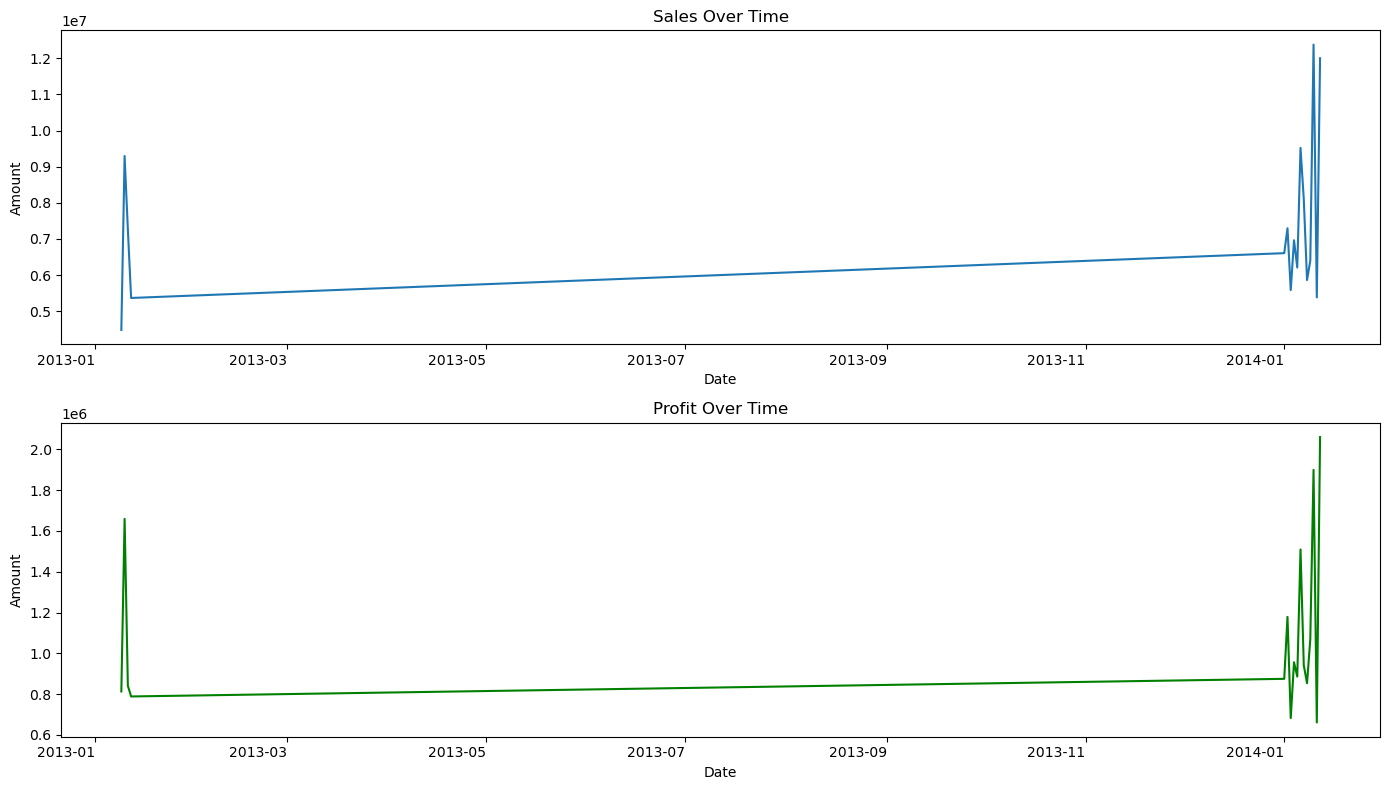

In [18]:
# Sales over Time
date_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(14,8))
# Plot sales over time
plt.subplot(2, 1, 1)
date_sales.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=0)

#Profit over Time
date_profit = df.groupby('Date')['Profit'].sum()

# Plot Profit over time
plt.subplot(2, 1, 2)
date_profit.plot(color='g')
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

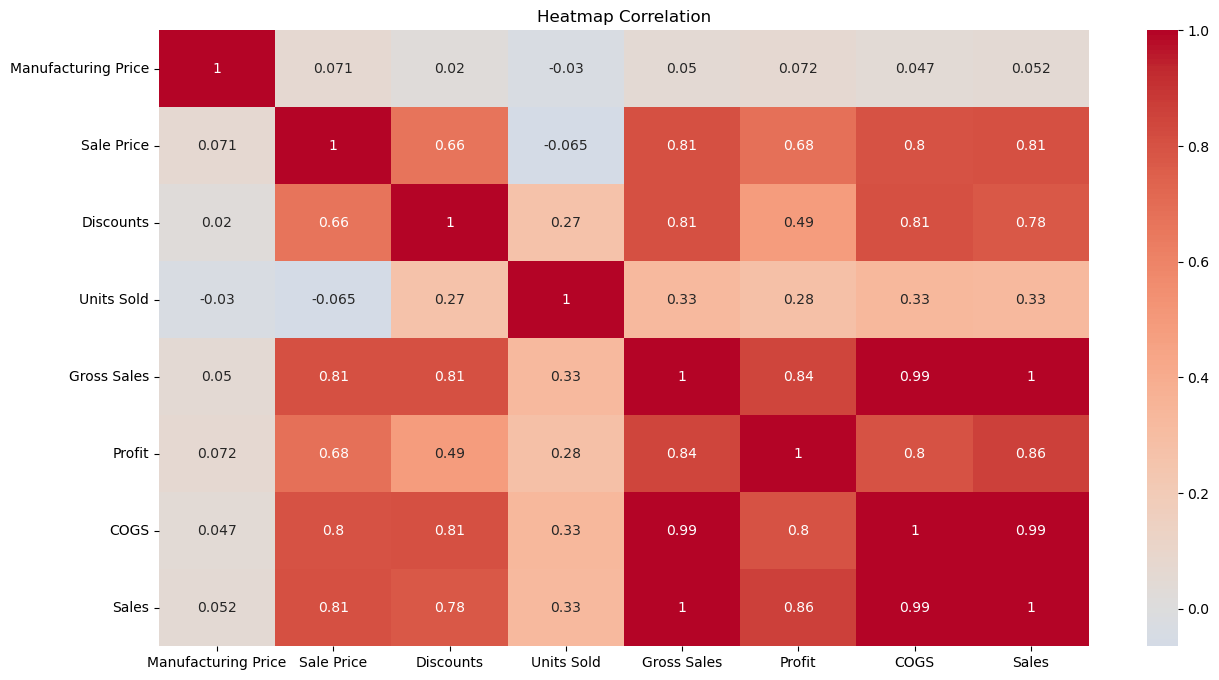

In [19]:
# Correlation
correlation = df[['Manufacturing Price', 'Sale Price', 'Discounts', 'Units Sold','Gross Sales', 'Profit', 'COGS', 'Sales']].corr()

# Plot heatmap of correlation
plt.figure(figsize= (15,8))
sns.heatmap(correlation, annot = True, cmap= 'coolwarm', center=0)
plt.xticks(rotation=0)
plt.title('Heatmap Correlation')
plt.show()

# Summary

### Market and Product Segmentation:

* "Enterprise" segment: The "Enterprise" segment has high sales, relatively low profits, and high average manufacturing price, high average sale price. It indicates potential challenges in managing operational costs and pricing strategies.

* Strengthen Strategy in the "Small Business" Segment: Even though the "Small Business" segment has a large sales contribution, profits can still be optimized. Identify whether there are opportunities to increase prices or reduce production costs without compromising product quality.

* Maximize the Potential of the "Government" Segment: The "Government" segment has a large profit contribution. Evaluate whether there are opportunities to expand services or products targeted at this segment.

### Discount :

* It is seen that discounts have a positive impact on increasing sales and profits.

### Featured Product:

* Paseo products have high sales and profits compared to other products.

### Optimization in Certain Countries:

* Optimizing in High Sales Countries: Countries like "Canada," "France," and "Germany" have high sales and profit contributions. Consider strengthening business strategies in these countries to optimize results.
